In [0]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
!pip install category_encoders

In [4]:
!pip install catboost
!pip install ipywidgets


In [5]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

train_df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
test_df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [0]:
sales_df = train_df


# Explore the Data

In [8]:

print(set(sales_df.Item_Fat_Content))
print(set(sales_df.Item_Type))
print(set(sales_df.Outlet_Size))
print(set(sales_df.Outlet_Type))
print(set(sales_df.Outlet_Location_Type))

{'low fat', 'reg', 'Regular', 'Low Fat', 'LF'}
{'Fruits and Vegetables', 'Others', 'Starchy Foods', 'Household', 'Dairy', 'Frozen Foods', 'Soft Drinks', 'Breakfast', 'Meat', 'Breads', 'Snack Foods', 'Baking Goods', 'Hard Drinks', 'Health and Hygiene', 'Seafood', 'Canned'}
{nan, 'High', 'Medium', 'Small'}
{'Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3'}
{'Tier 2', 'Tier 3', 'Tier 1'}


In [9]:
#check missing values
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 8 Text xticklabel objects>)

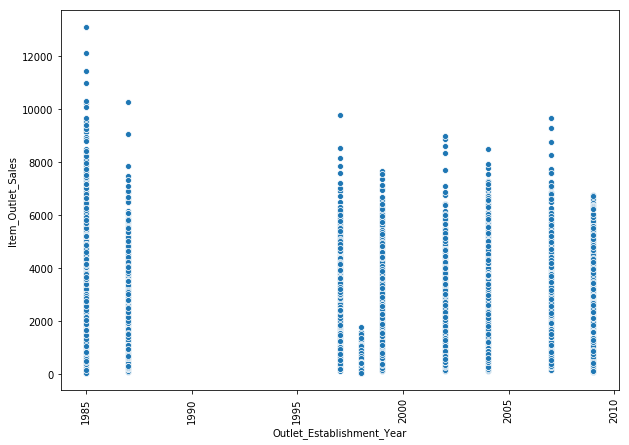

In [10]:
fig = plt.figure(figsize=(10,7))
sns.scatterplot(x=sales_df['Outlet_Establishment_Year'],y=sales_df['Item_Outlet_Sales'],data=sales_df)
plt.xticks(rotation='90')

([0, 1, 2], <a list of 3 Text xticklabel objects>)

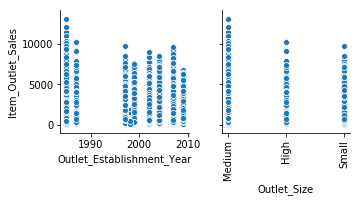

In [11]:
sns.pairplot(sales_df, diag_kind='kde', x_vars=['Outlet_Establishment_Year', 'Outlet_Size'], y_vars=['Item_Outlet_Sales'])
plt.xticks(rotation='90')

# cleaning and imputing data

In [12]:
(sales_df['Item_Visibility']==0).sum()

526

In [0]:
#change the (zero value of Item_Visibility) to the mean of (Non zero values of Item_Visibility)
#according to Item_Identifier
ID = set(sales_df['Item_Identifier'])
for i in ID:
    sales_df.loc[(sales_df["Item_Identifier"]==str(i)) & (sales_df["Item_Visibility"]==0),"Item_Visibility"] = sales_df.loc[(sales_df["Item_Identifier"]==str(i)) & (sales_df["Item_Visibility"]!=0),"Item_Visibility"].mean()
#apply the same on the test set   
    test_df.loc[(test_df["Item_Identifier"]==str(i)) & (test_df["Item_Visibility"]==0),"Item_Visibility"] = test_df.loc[(test_df["Item_Identifier"]==str(i)) & (test_df["Item_Visibility"]!=0),"Item_Visibility"].mean()

#Now we check the Zero values in Item_Visibility
(sales_df['Item_Visibility']==0).sum()

In [0]:
sales_df['Item_Weight'].isnull().sum()

In [0]:
for i in ID:
    sales_df.loc[(sales_df["Item_Identifier"]==str(i)) & (sales_df["Item_Weight"].isnull()),"Item_Weight"] = sales_df.loc[(sales_df["Item_Identifier"]==str(i))&(sales_df["Item_Weight"].notnull()),"Item_Weight"].mean()
    #apply the same on the test set
    test_df.loc[(test_df["Item_Identifier"]==str(i)) & (test_df["Item_Weight"].isnull()),"Item_Weight"] = test_df.loc[(test_df["Item_Identifier"]==str(i))&(test_df["Item_Weight"].notnull()),"Item_Weight"].mean()
sales_df['Item_Weight'].isnull().sum()

In [0]:
sales_df['Item_Weight'].fillna(sales_df['Item_Weight'].mean(),inplace=True)
#apply the same on the test set
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)


In [0]:

sales_df['Item_Weight'].isnull().sum()

we need to fix Outlet_Size column

In [0]:
#NaN values in Outlet_Size column
sales_df["Outlet_Size"].isnull().sum()

In [0]:
sales_df.loc[sales_df['Outlet_Size'].isnull(),['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']].head(10)

Notice that missing Outlit_Size is assigned eather to 'Tier 2' or 'Tier 3'

In [0]:
sales_df.loc[((sales_df['Outlet_Location_Type']=='Tier 2') | (sales_df['Outlet_Location_Type']=='Tier 3'))&(sales_df['Outlet_Size'].notnull()),['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']].head(15)

'Tier 2' has 'Outlet_Size' that has always the value (small) and 'Outlet_Type' (Supermarket Type1)
so we can impute the 'Outlet_Size' of OUT045 and OUT017 as small

In [0]:
sales_df.loc[(sales_df['Outlet_Identifier']=='OUT045')|(sales_df['Outlet_Identifier']=='OUT017'), 'Outlet_Size']='Small'

test_df.loc[(test_df['Outlet_Identifier']=='OUT045')|(test_df['Outlet_Identifier']=='OUT017'), 'Outlet_Size']='Small'

for OUT010 we cant't impuute 'Outlet_Size' so we need to build a classifier

# build a model to classify Outlet_Size

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
cols = ['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type'] #columns of interest
x_train = sales_df[sales_df.Outlet_Size.notnull()]
y_train = x_train.pop('Outlet_Size')
x_target = sales_df[sales_df.Outlet_Size.isnull()]
x_target.drop('Outlet_Size', axis=1, inplace=True)
x_train = x_train[cols]
x_target = x_target[cols]

le=LabelEncoder()
for i in cols: 
    le.fit(sales_df[i])
    x_train[i]=le.transform(x_train[i])
    x_target[i]=le.transform(x_target[i])

    
GBC = GradientBoostingClassifier(learning_rate = 0.01, max_depth=3, random_state=5)
GBC.fit(x_train,y_train)
target = GBC.predict(x_target)

In [0]:
set(target)

In [0]:
sales_df.loc[(sales_df["Outlet_Size"].isnull()),"Outlet_Size"] = 'High'

test_df.loc[(test_df["Outlet_Size"].isnull()),"Outlet_Size"] = 'High'

In [0]:
sales_df["Outlet_Size"].value_counts()


In [0]:
sales_df[sales_df.Outlet_Size.isnull()]

In [0]:
#Fix Item_Fat_Content column
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg','Regular')

test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('reg','Regular')

# Plot corrlation

In [0]:
plt.matshow(sales_df.corr())
plt.show()

In [0]:
sns.pairplot(sales_df,diag_kind="kde", x_vars=['Item_Outlet_Sales','Item_Visibility'],y_vars=['Outlet_Establishment_Year','Item_Visibility'],
             plot_kws=dict(s=50, edgecolor="y", linewidth=0.5),diag_kws=dict(shade=True), markers='o')
plt.show()

In [1]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")
x = sales_df.Item_Visibility
y = sales_df.Item_Type
z = sales_df.Item_Outlet_Sales
X, Y, Z = np.meshgrid(x, y, z)

NameError: ignored

In [0]:
ig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [422]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## build predicting model

### converting categorical features to numerical

In [423]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('Low Fat', 1)
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('Regular', 2)

replacement = {'Small':1, 'Medium':2, 'High':3}
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].map(replacement)

sales_df['Outlet_Location_Type'] = sales_df['Outlet_Location_Type'].replace('Tier 1', 1)
sales_df['Outlet_Location_Type'] = sales_df['Outlet_Location_Type'].replace('Tier 2', 2)
sales_df['Outlet_Location_Type'] = sales_df['Outlet_Location_Type'].replace('Tier 3', 3)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,3,3,Grocery Store,732.3800
4,NCD19,8.93,1,0.016164,Household,53.8614,OUT013,1987,3,3,Supermarket Type1,994.7052


In [424]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('Low Fat', '1')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('Regular', '2')

replacement = {'Small':1, 'Medium':2, 'High':3}
test_df['Outlet_Size'] = test_df['Outlet_Size'].map(replacement)

test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].replace('Tier 1', '1')
test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].replace('Tier 2', '2')
test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].replace('Tier 3', '3')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,Snack Foods,107.8622,OUT049,1999,2,1,Supermarket Type1
1,FDW14,8.300,2,0.038428,Dairy,87.3198,OUT017,2007,1,2,Supermarket Type1
2,NCN55,14.600,1,0.099575,Others,241.7538,OUT010,1998,3,3,Grocery Store
3,FDQ58,7.315,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,2,Supermarket Type1
4,FDY38,13.600,2,0.118599,Dairy,234.2300,OUT027,1985,2,3,Supermarket Type3


In [0]:
converted_df = sales_df.copy()

In [426]:
converted_df = pd.get_dummies(converted_df,columns=["Item_Type", "Outlet_Identifier", "Outlet_Type"])
converted_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1,0.016047,249.8092,1999,2,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,DRC01,5.92,2,0.019278,48.2692,2009,2,3,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,1,0.016760,141.6180,1999,2,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,FDX07,19.20,2,0.022911,182.0950,1998,3,3,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,1,0.016164,53.8614,1987,3,3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [427]:
converted_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Ty

## first try to encode Item_Identifier with label encoder which encode the calsess with numbers of [0-(No.classes - 1)]

In [0]:
le_df = converted_df.copy()

In [0]:
le=LabelEncoder()
le_df['Item_Identifier'] = le.fit_transform(le_df['Item_Identifier'])

In [0]:
colss = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
le_Xtrain = le_df[colss]
#Xtrain.drop('Item_Sales', axis =1, inplace=True)
#Ytrain = sales_df.pop('Item_Outlet_Sales')
Ytrain = le_df['Item_Outlet_Sales']

In [431]:
set(le_Xtrain.Outlet_Size)

{1, 2, 3}

In [432]:
le_Xtrain.shape

(8523, 35)

In [433]:
Ytrain.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression

In [434]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler().fit(le_Xtrain)
le_Xtrain = sc.transform(le_Xtrain)


XX_train, XX_test, yy_train, yy_test = train_test_split(le_Xtrain, Ytrain, test_size=0.3, random_state=5)

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [435]:
yy_predicted = reg.predict(XX_test)

leRMSE = np.sqrt(mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
leRMSE/(np.max(yy_test)-np.min(yy_test)) # Normalizing RMSE

0.08724093843832374

##GradientBoost Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [437]:
GBR =GradientBoostingRegressor()
GBR.fit(XX_train, yy_train)
ypredict = GBR.predict(XX_test)
GB_RMSE = np.sqrt(mean_squared_error(yy_test,yy_predicted))
GB_RMSE/(np.max(yy_test)-np.min(yy_test)) # Normalizing RMSE

0.08724093843832374

## now we try with Catboost Regressor and encod with CatBoost instead of label encoder

In [438]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [439]:
categorical_features_indices = np.where(sales_df.dtypes == np.object)[0]
categorical_features_indices

array([ 0,  4,  6, 10])

In [0]:
cat_Xtrain = sales_df.drop(['Item_Outlet_Sales'], axis=1)
cat_Ytrain = sales_df['Item_Outlet_Sales']

In [0]:
catX_train, catX_test, catY_train, catY_test = train_test_split(cat_Xtrain, cat_Ytrain, test_size=0.3, random_state=5)

In [448]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
cat_model.fit(cat_Xtrain, cat_Ytrain, cat_features=categorical_features_indices, eval_set=(catX_test, catY_test))

0:	learn: 2556.5839220	test: 2554.7791660	best: 2554.7791660 (0)	total: 6.88ms	remaining: 337ms
1:	learn: 2368.1581132	test: 2365.0018206	best: 2365.0018206 (1)	total: 12.9ms	remaining: 310ms
2:	learn: 2194.8177528	test: 2190.2288736	best: 2190.2288736 (2)	total: 18.5ms	remaining: 290ms
3:	learn: 2044.2226918	test: 2039.4087731	best: 2039.4087731 (3)	total: 23.8ms	remaining: 273ms
4:	learn: 1909.2997697	test: 1903.8221559	best: 1903.8221559 (4)	total: 28.9ms	remaining: 260ms
5:	learn: 1794.4478285	test: 1786.9854355	best: 1786.9854355 (5)	total: 34.1ms	remaining: 250ms
6:	learn: 1695.0738831	test: 1686.9841109	best: 1686.9841109 (6)	total: 39.2ms	remaining: 241ms
7:	learn: 1606.7985737	test: 1598.6937473	best: 1598.6937473 (7)	total: 44.8ms	remaining: 235ms
8:	learn: 1530.5101995	test: 1522.3565320	best: 1522.3565320 (8)	total: 49.8ms	remaining: 227ms
9:	learn: 1465.2070867	test: 1456.5100642	best: 1456.5100642 (9)	total: 55.5ms	remaining: 222ms
10:	learn: 1409.9267055	test: 1400.09220

In [449]:
from sklearn.metrics import mean_squared_error

prediction = cat_model.predict(catX_test)
RMSE = np.sqrt(mean_squared_error(catY_test, prediction))
RMSE/(np.max(catY_test)-np.min(catY_test)) # Normalizing RMSE

0.08310581885302169

CatBoost Regressor has the smallest RMSE

now let's predict Test outcoms

In [0]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test_df['Item_Identifier']
submission['Outlet_Identifier'] = test_df['Outlet_Identifier']
submission['Item_Outlet_Sales'] = cat_model.predict(test_df)
submission.to_csv("Submission.csv")

In [452]:
submission.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2183.962759
std,1280.061664
min,35.168052
25%,1094.892108
50%,2074.937730
75%,3073.390871
max,6148.190753
